# Kaggle Titanic Project
## by Comando PS

## 1. Table of contents

1. Table of Contents  
2. [Introduction](#Introduction)  
3. [Business Understanding](#Business_understanding)  
    3.1. [Background](#Background)  
    3.2. [Problem description](#Problem_description)  
    3.3. [Target audience](#Target_audience)  
    3.4. [Success criteria](#Success_criteria)  
4. [Data Understanding](#Data_understanding)  
    4.1. [Structure of training and test sets](#Data_structure)  
    4.2. [Submission set](#Submission_set)  
    4.3. [Exploratory data analysis](#EDA)  
        4.3.1. Survival  
        4.3.2. Sex  
        4.3.3. Passenger class  
        4.3.4. Age  
5. [Data preparation](#Data_preparation)  
    5.1. [Feature engineering](#Feature_engineering)  
        5.1.1. data  
        5.1.2. data
        5.1.3. data
        5.1.4. data
    5.2 [Data wrangling](#Data_wrangling)
6. [Modeling](#Modeling)  
7. [Evaluation](#Evaluation)
8. [Conclusion](#Conclusion)


<a id='Introduction'></a>
## 2. Introduction

In this notebook we will try to complete the introductory project for kaggle, which is trying to predict if a group of passengers on board of RMS Titanic survived or not the [tragic sinking of the ship in the early hours of 15 April 1912](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic). This notebook is intended to start learning ML so it will be based on some notebooks we have deemed interesting on the internet. References will be provided when needed.

![RMS Titanic][RMS]

[RMS]: https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/RMS_Titanic_sea_trials_April_2%2C_1912.jpg/637px-RMS_Titanic_sea_trials_April_2%2C_1912.jpg "RMS Titanic"

To collect insights from data we will be applying the [CRISP-DM](https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining "Wikipedia CRISP-DM page") (Cross Industry Standard Process for Data Mining) methodology.

![CRISP-DM][MET]

[MET]: https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/599px-CRISP-DM_Process_Diagram.png "CRISP-DM Methodology"

CRISP-DM methodology breaks the process of data mining into six phases:

1. Business understanding: Understand what we need from the data.
2. Data understanding: See how is the data formatted, what tools we need to operate with it and extract some basic insights (Exploratory Data Analysis, or EDA).
3. Data preparation: Data wrangling and feature engineering.
4. Modeling: Build a model to extract the answers needed from our data.
5. Evaluation: Use a metric to compare our results and gain some feedback from our model to further improve it.
6. Deployment: Submit our result to Kaggle.

<a id='Business_understanding'></a>
## 3. Business understanding

<a id='Background'></a>
### 3.1. Background

The sinking of RMS Titanic is one of the most infamous sinkings in contemporary history. The RMS Titanic sank in the early hours of 15 April 1912, four days into her maiden's voyage after she struck an iceberg. Of the 2224 estimated people on board approximately 1500 people died in the accident, making it one of the most lethal peacetime maritimal disasters in history.

One of the reasons for such lethality was that there was not enough lifeboats for everyone. There was some element of luck involved in the survival probability, but there is evidence that some groups of people were more fortunate than others.

<a id='Problem_description'></a>
### 3.2. Problem description

Using some data from the RMS Titanic passenger list we have to predict whether or not a given passenger had survived the sinking or not. Kaggle is asking us to build a predictive model answering the following question: “what sorts of people were more likely to survive? using passenger data (ie name, age, gender, socio-economic class, etc)". 

<a id='Target_audience'></a>
### 3.3. Target audience

This notebook will be used to learn some machine learning techniques and how to manage a successful team. The primary audience will be ourselves, but when it is finished it will be published for anyone to read. Any constructive criticism will be welcome.

<a id='Success_criteria'></a>
### 3.4. Success criteria

The main metric employed to decide our model is successful or not is the accuracy of the model (i.e. in how many passengers the outcome was correctly predicted).

<a id='Data_understanding'></a>
## 4. Data understanding

Kaggle gives us two different csv files. One will be used to train our model (called train.csv) whereas the other will be used to test the model (unsurprisingly called test.csv). Test.csv does not contain information about the survival outcome of the passenger and we need to infer it from our model.

<a id='Data_structure'></a>
### 4.1. Structure of training and test sets

Train.csv contains data from 891 different passengers of the titanic with unique ID and full name, stating if they survived or not (column 'survived'), the ticket class ('Pclass'), sex ('Sex'), number of siblings/spouses aboard ('Sibsp'), number of parents/children aboard ('parch'), ticket number ('ticket'), fare ('fare'), cabin number aboard ('cabin') and port of embarcation ('embarked').

Some notes from the documentation:

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

<a id='Submission_set'></a>
### 4.2. Submission set

The submission set shall be composed of only two columns: The passenger id from the test set and a column indicating if that passenger survived or not.

<a id='EDA'></a>
### 4.3. Exploratory Data Analysis (EDA)

First, some libraries will be imported:

In [1]:
import pandas as pd #pandas is a data analysis and manipulation tool.
import numpy as np #Package for scientific computing with Python.
import matplotlib.pyplot as plt #Python data visualization library.
import seaborn as sns #Python data visualization library based on matplotlib.
import re #regular expressions

#Matlplotlib and seaborn options:
%matplotlib inline
sns.set(style="whitegrid")

To study the full set, let's merge both datasets. In the case of the test data, the survival value will be set to NaN. The passenger ID is a unique number, different for every passenger on board. This ID will be set as the index of the dataframe.

In [2]:
df_train=pd.read_csv('data/train.csv')
df_test=pd.read_csv('data/test.csv')

survive=np.empty((418,1))
survive[:]=np.nan
df_test.insert(1,'Survived',survive)

df_full=df_train.append(df_test,ignore_index=True)
print('Dataset sizes:','\n df_train: ',df_train.shape,'\n df_test:  ',df_test.shape,'\n df_full:  ',df_full.shape)

df_full.reset_index()
df_full.set_index('PassengerId', inplace=True) #Set the passenger id as index in both the test and train sets

df_full.head()

Dataset sizes: 
 df_train:  (891, 12) 
 df_test:   (418, 12) 
 df_full:   (1309, 12)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The data type for each column is shown below.

In [3]:
df_full.dtypes

Survived    float64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In the dataset there are both numerical variables (survived, pclass...) and categorical variables (sex, embarked). Categorical variables will be transformed to something the models can use using dummy variables. This means that the categorical variables will be transformed into dichotomic categorical variables in form of a number (1 for yes, 0 for no). This will be performed before the modeling section.

Since survived is either 1 or 0, it will be transformed into an integer type (int64), as is Pclass. Name is comprised of different strings, as the Sex column, but that one will be transformed. Age is float, since there are some estimation in the ages and those are indicated with a ".5". SibSp and Parch are people counts, so they are integers. Ticket is another string. Fare is a floating point number with sometimes a lot of decimals. This is due to the fact that the currency used in 1912 in the United Kingdom did not follow base-10 numbers. More information can be found in the [pre-decimal currency Wikipedia article](https://en.wikipedia.org/wiki/%C2%A3sd). Cabin is another string, and, finally, Embarked is a categorical variable with each letter indicating where the passenger boarded the ship.

In the next cell, a brief statistical description of both categorical and numerical variables can be seen

In [4]:
df_full.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


#### 4.3.1. Survival

In [5]:
df_full['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

The data for the survival outcome of the passengers is only known for the passengers in the training set (891 out of 1309 people). Only the 38% of passengers in the set have survived the sinking. In the following sections we will explore how survival correlates with other variables.

#### 4.3.2. Sex

In [6]:
print("Number of females:", df_full.loc[df_full.Sex=='female'].shape[0])
print("Number of males:", df_full.loc[df_full.Sex=='male'].shape[0])

Number of females: 466
Number of males: 843


There are 466 females and 843 males in our dataset.

In the kaggle tutorial it is explained that gender played a key role in regards of survival probability, even creating a model that only looked at the sex of the passenger and then assigning the label survived=1 to females only, obtaining an impressive punctuation in the leaderboard. Let us explore how sex correlates with survival probability.

Percentage of women who survived: 74.2 %
Percentage of men who survived: 18.89 %


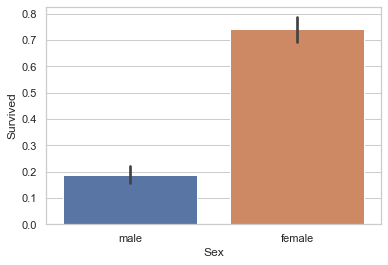

In [7]:
rate_women=100 * df_train.loc[df_train.Sex == 'female']["Survived"].sum()/df_train.loc[df_train.Sex=='female'].shape[0]
rate_men=100 * df_train.loc[df_train.Sex == 'male']["Survived"].sum()/df_train.loc[df_train.Sex=='male'].shape[0]

print("Percentage of women who survived:", round(rate_women,2),'%')
print("Percentage of men who survived:", round(rate_men,2),'%')

fig1=sns.barplot(x="Sex", y="Survived", data=df_full)

Only 18.89 % of men survived, compared with the 74.2 % of women. Is it true the "Women and children first" saying? Apparently, in 1912 it was _en vogue_.

#### 4.3.3. Passenger class

Let us see if there is some correlation between the passenger class and the survival rate.

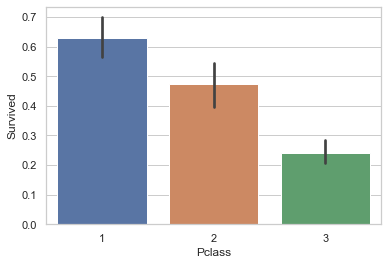

In [8]:
fig2=sns.barplot(x="Pclass", y="Survived", data=df_full)

People in first class have more survival rate than the other two ticket classes. It is possible that the social class can be used as a feature of our survival prediction model. How is distributed by sex and class?

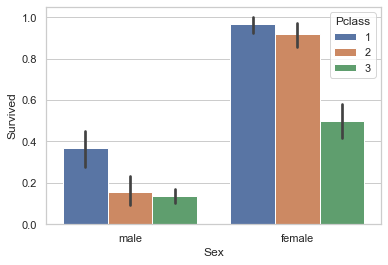

In [9]:
fig3=sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df_full)

#### 4.3.4 Age

In [10]:
df_full['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

Ther are 1046 values of 1309 possible values. This indicates that some age values are missing. The average age is less than 30 years old (29.9 years), with a standard deviation of 14.4 years. The youngest recorded passenger was a little older than 2 months (0.17 years) old, whereas the oldest passenger was 80 years old. More than 75% of the passengers were less than 40 years old. How are the age and the survival outcome correlated?

In [11]:
#df_ages=pd.DataFrame()
#df_ages['Age']=pd.cut(df_train['Age'], 8)
#df_ages['Survived']=df_train['Survived']
#df_ages[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()

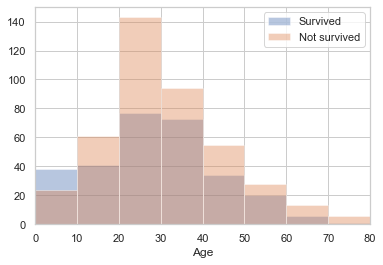

In [13]:
fig2, ax2 = plt.subplots()
labels=['Survived','Not survived']
for a,lab in zip([df_full[df_full['Survived']==1]['Age'], df_full[df_full['Survived']==0]['Age']],labels):
    sns.distplot(a, bins=range(0, 81, 10), ax=ax2, kde=False, label=lab)
ax2.set_xlim([0, 80])
plt.legend()
plt.show()

This histogram shows us how the survival probability correlates with age. We can see that is more probable to survive for people from 0 to 10 years old. In the other groups of age it is more probable to not survive than leaving the sinking boat alive. This is specially significant in the 20-40 year brackets.

How about we combine both sex and age and study the survival probabilities?

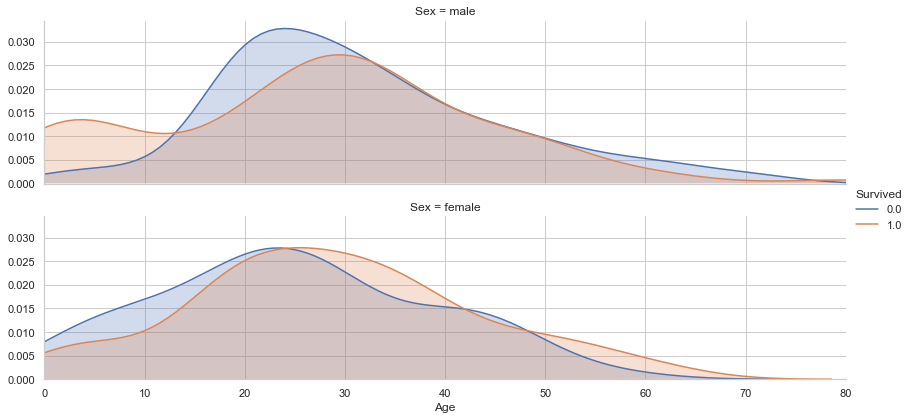

In [14]:
fig1=sns.FacetGrid(df_full,hue='Survived',aspect=4,row='Sex')
fig1.map(sns.kdeplot,'Age',shade=True)
fig1.set(xlim=(0,df_full["Age"].max()))
fig1.add_legend()

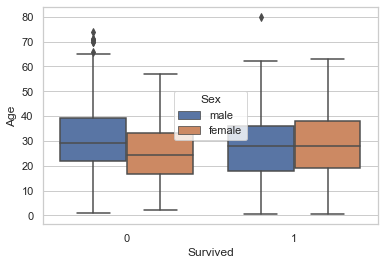

In [15]:
sns.boxplot(x='Survived',y='Age',hue='Sex',data=df_train)

For both sexes, the bulk of people surviving concentrates in the ages between 20 and 40 years old. There is a local maximum for young males. The survival distribution for females tends to be more uniform, with females surviving around all age brackets and showing a maximum at around 25 years of age. There is also a little peak at around 50 years old that is not shown for the male population.

#### Ticket Fare

And in the following graph we can see the survival probability as a function of ticket fare, as a whole (first graph) and separated for male and female passengers.

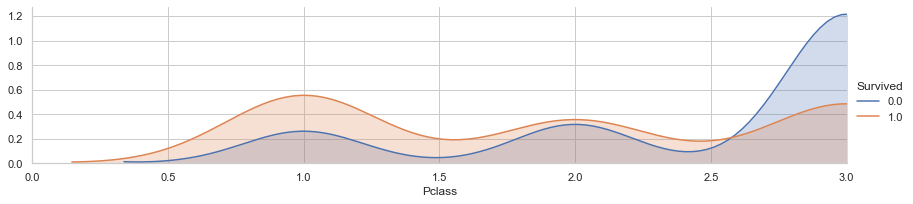

In [16]:
fig5=sns.FacetGrid(df_full,hue='Survived',aspect=4)
fig5.map(sns.kdeplot,'Pclass',shade=True)#.set(yscale = 'log')
fig5.set(xlim=(0,df_full["Pclass"].max()))
fig5.add_legend()

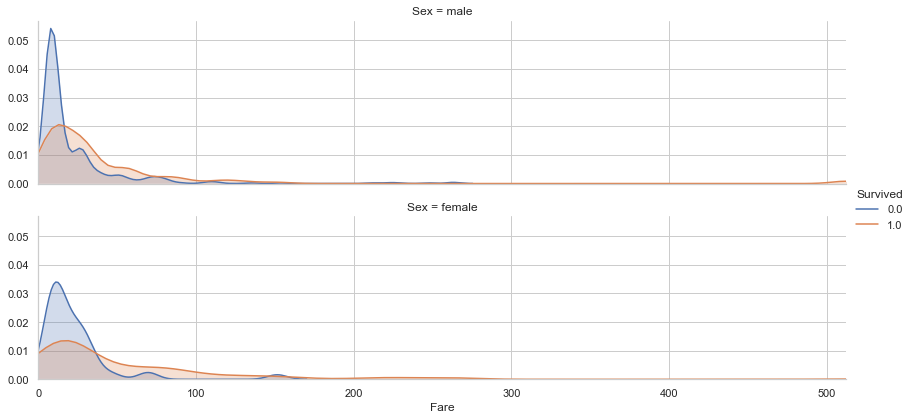

In [17]:
fig3=sns.FacetGrid(df_full,hue='Survived',aspect=4,row='Sex')
fig3.map(sns.kdeplot,'Fare',shade=True)#.set(yscale = 'log')
fig3.set(xlim=(0,df_full["Fare"].max()))
fig3.add_legend()

Text(0, 0.5, 'Frecuency')

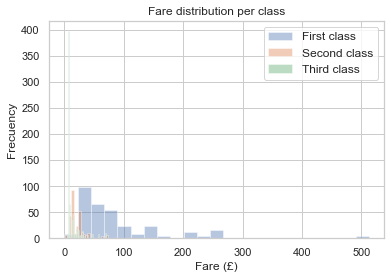

In [18]:
df=df_full[df_full.Pclass==1]
sns.distplot(df['Fare'],  kde=False, label='First class')
df=df_full[df_full.Pclass==2]
sns.distplot(df['Fare'],  kde=False, label='Second class')
df=df_full[df_full.Pclass==3]
sns.distplot(df['Fare'],  kde=False, label='Third class')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Fare distribution per class')
plt.xlabel('Fare (£)')
plt.ylabel('Frecuency')

#### Family Size

We can also study how the survival probability correlates with having family members aboard the titanic. The survival distribution as a function of the variable Sibsp is as follows

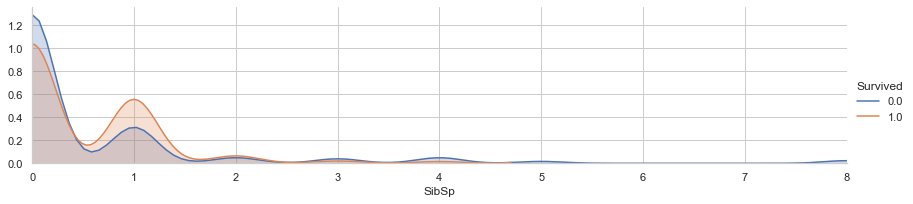

In [19]:
fig5=sns.FacetGrid(df_full,hue='Survived',aspect=4)
fig5.map(sns.kdeplot,'SibSp',shade=True)#.set(yscale = 'log')
fig5.set(xlim=(0,df_full["SibSp"].max()))
fig5.add_legend()

These plots show that the cost of the fare may be correlated with survival, as the non-survival probability is much higher in the low-paying fares than in the more expensive ones, for both male and female passengers.

### Port of Embark

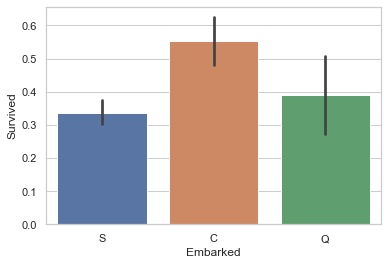

In [20]:
fig9=sns.barplot(x="Embarked",y="Survived",data=df_full)

We have now a lot of information to start working on the model. 

## Data Preparation

We need to convert some of the categorical variables in order to feed them to our model. First, we will convert the variable 'Sex'. Since in the records from that era the sex was treated as a binary dichotomic value (you were either male or female) we will use that in our model as well, with 1 being male and 0 female.

In [ ]:
df_full['Sex'] = df_full['Sex'].map({'male':1,'female':0})
df_full

### Feature Engineering

In [ ]:
df_full.count()

#### Title information

In [ ]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
        return ""

In [ ]:
df_full['Title'] = df_full['Name'].apply(get_title)

df_full['Title'] = df_full['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                            'Major', 'Rev', 'Sir', 'Jonkheer'], 'Noble')   
df_full['Title'] = df_full['Title'].replace('Don', 'Mr')
df_full['Title'] = df_full['Title'].replace(['Mlle','Ms'], 'Miss')
df_full['Title'] = df_full['Title'].replace(['Mme','Dona'], 'Mrs')

male_dr_filter = (df_full.Title == 'Dr') & (df_full.Sex == 1)
female_dr_filter = (df_full.Title == 'Dr') & (df_full.Sex == 0)

df_full.loc[male_dr_filter, ['Title']] = 'Mr'
df_full.loc[female_dr_filter, ['Title']] = 'Mrs'

print(pd.crosstab(df_full['Title'], df_full['Sex']))

#### Segmentation of age groups

In [ ]:
X_age = pd.DataFrame({'Age': df_full.Age, 'Survived': df_full.Survived}).dropna()

In [ ]:
#X_age = preprocessing.StandardScaler().fit_transform(X_age)

In [ ]:
#X_age=pd.DataFrame()
#X_age=df_full.loc[:891,['Age','Survived']].copy()
#X_age['Survived']=df_full[:891].Survived

In [ ]:
from sklearn.cluster import KMeans #K Means clustering

In [ ]:
Sum_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k,init='k-means++')
    km = km.fit(X_age)
    Sum_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K, Sum_squared_distances, 'bx-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for optimal number of clusters')
plt.savefig('elbow.png',dpi=300)
plt.show()

In [ ]:
n_cl = 4
kmeans = KMeans(n_clusters=n_cl, init='k-means++')
kmeans.fit(X_age)

X_age['Label']=kmeans.labels_


In [ ]:
# Plot the decision boundary
# See http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
plt.figure(figsize=(10,5))
h = 0.01
x_min, x_max = X_age['Age'].min() - h, X_age['Age'].max() + h
y_min, y_max = X_age['Survived'].min() - h, X_age['Survived'].max() + h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the age cluster for each point in a mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
cmap = sns.cubehelix_palette(start=2.8, rot=.1, as_cmap=True)
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap, aspect='auto')

# Plot the ages
sns.scatterplot(x='Age', y='Survived', hue='Label', data=X_age, palette=cmap)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w')
plt.yticks([0, 1])
plt.title("Age clusters and decision boundaries")
plt.show()

In [ ]:
# Convert K-means clusters to age bands
age_bands = []
for k in range(n_cl):
    age_bands.append(xx[Z==k].min())

# Since the clusters are not sorted we sort the intervals
age_bands.sort()

# Set the lower bound of the first interval to 0
age_bands[0] = 0

# Set the higher bound of the last interval to infinite just in case there are older older passengers in the test set
age_bands.append(np.inf)

# Convert list to numpy array
print("Age bands: {}".format(np.array(age_bands)))

#### Age

Now we can fill the missing values in some of the variables. The age seems to be missing in some of the entries. To fill the data, we will calculate the median as a function of sex and passenger class.

In [ ]:
ages_table=df_full[:891].groupby(['Title','Pclass'])['Age'].median()
ages_table

In [ ]:
df_full['Age']=df_full['Age'].fillna(0)

In [ ]:
df_full.loc[(df_full.Age == 0)]

In [ ]:
for ind,row in df_full[df_full['Age']==0].iterrows():
    df_full.loc[ind,'Age']=ages_table[row.Title][row.Pclass]

In [ ]:
df_full.loc[(df_full.Age == 0)]

In [ ]:
df_full['AgeBand'] = pd.cut(df_full['Age'], age_bands)

df_full.groupby('AgeBand')['Survived'].mean()

In [ ]:
df_full.AgeBand.dtype

#### Family Size

In [ ]:
df_full['FamilySize'] = df_full['SibSp'] + df_full['Parch'] + 1

In [ ]:
#df_full['IsAlone'] = df_full.FamilySize.apply(lambda x: 1 if x == 1 else 0)

#### Fare

In [ ]:
df_full['TicketOcurr'] = df_full.groupby('Ticket')['Ticket'].transform('size')
df_full['FarePerPerson'] = df_full['Fare']/df_full['TicketOcurr']

In [ ]:
df_full[df_full[['FarePerPerson']].isnull().any(axis=1)]

In [ ]:
fares_table=df_full[:891].groupby('Pclass')['FarePerPerson'].median()
print(fares_table)

In [ ]:
df_full['IsAlone'] = df_full.TicketOcurr.apply(lambda x: 1 if x == 1 else 0)

In [ ]:
df_full[df_full[['Fare']].isnull().any(axis=1)]

In [ ]:
for df, fare in zip([df_full],[fares_table]):
    for cls in np.unique(df.Pclass):
        df.loc[(df['FarePerPerson'].isnull()) & (df['Pclass']==cls),'FarePerPerson']=fare.loc[cls]

In [ ]:
df_full[df_full.FarePerPerson.isnull()]

In [ ]:
df=df_full[df_full.Pclass==1]
sns.distplot(df['FarePerPerson'],  kde=False, label='First class')
df=df_full[df_full.Pclass==2]
sns.distplot(df['FarePerPerson'],  kde=False, label='Second class')
df=df_full[df_full.Pclass==3]
sns.distplot(df['FarePerPerson'],  kde=False, label='Third class')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Fare distribution per class')
plt.xlabel('Fare per person (£)')
plt.ylabel('Frecuency')
plt.savefig('Fares.png',dpi=300)
plt.show()

In [ ]:
df_full[df_full['Fare']==0]

#### Port of Embarkment

In [ ]:
df_full[df_full[['Embarked']].isnull().any(axis=1)]

In [ ]:
num_nan=df_full[df_full[['Embarked']].isnull().any(axis=1)].index
port_samp=list(df_train['Embarked'].sample(len(num_nan),replace=True))

In [ ]:
for i in range(len(num_nan)):
    df_full.loc[num_nan[i],'Embarked']=port_samp[i]

In [ ]:
df_full[df_full[['Embarked']].isnull().any(axis=1)]

In [ ]:
df_full=pd.get_dummies(df_full, columns=["Embarked"])

#### Making dummies of categorical variables

In [ ]:
df_full=pd.get_dummies(df_full, columns=["Pclass"])

In [ ]:
df_full=pd.get_dummies(df_full, columns=["Title"])


In [ ]:
df_full=pd.get_dummies(df_full, columns=["AgeBand"])

In [ ]:
df_full.head()

### Modeling

In [ ]:
#Generate the correlation matrix for the train set
corr_full=df_full.corr()

In [ ]:
fig_10=plt.figure(figsize=(10,10))
sns.heatmap(corr_full, annot=True)
plt.title("Titanic survivor correlation matrix heatmap")
plt.show()

In [ ]:
df_full.columns

In [ ]:
#features = Sex	IsAlone	FarePerPersonEmbarked_CEmbarked_QEmbarked_SPclass_1Pclass_2Pclass_3Title_MasterTitle_MissTitle_MrTitle_MrsTitle_NobleAgeBand_(0.0, 13.16]AgeBand_(13.16, 27.67]AgeBand_(27.67, 43.52]AgeBand_(43.52, inf]
data = df_full.drop(['Survived','Name','Age','SibSp','Parch','Ticket','Fare','Cabin','FamilySize','TicketOcurr','FarePerPerson'],axis=1)
data.head()

In [ ]:
target = df_train.Survived # being df_train the original train data we imported in the beginning 
train = data[0:891]        # "original" train set containing transformed/selected features
test = data[891:]    # "original" test set containing transformed/selected features 

In [ ]:
train.shape

In [ ]:
target.shape

In [ ]:
test.shape

#### Preprocessing

In [ ]:
X = preprocessing.StandardScaler().fit_transform(train)
y = target

### SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print('\n')

In [ ]:
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train) 
yhat = clf_rbf.predict(X_test)
mat=confusion_matrix(y_test, yhat)
sns.heatmap(mat.T, cmap=("Blues"), square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not survived','Survived'],
            yticklabels=['Not survived','Survived'])
plt.xlabel('true label')
plt.ylabel('predicted label');
print(classification_report(y_test, yhat))

True or false indicated if the classifier predicted the class correctly. Positive or negative indicates if the classifier predicted the desired class.

In [ ]:
from sklearn.model_selection import learning_curve , ShuffleSplit
from plot_learning_curve import plot_learning_curve

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

title = r"Learning Curves (SVM, RBF kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(clf_rbf, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()

In [ ]:
print(f'Tuned SCV Accuracy: {round(accuracy_score(y_test, yhat), 2)}')

In [ ]:
X_val=validation
X_val=preprocessing.StandardScaler().fit(train).transform(X_val)
y_val=clf_rbf.predict(X_val)

#print(f'Tuned SCV Accuracy: {round(accuracy_score(y_test, y_val), 2)}')

In [ ]:
submission = pd.DataFrame({
       "PassengerId": df_test["PassengerId"],
       "Survived": y_val
   })

print(submission.shape)
submission.to_csv('titanic_svc.csv', index=False)

#kaggle competitions submit -c titanic -f titanic_svc_test.csv -m "Test of automatic submission"

### Optimized SVM

In [ ]:
C_val=[0.01, 0.05, 0.1, 0.5, 1, 10]

param_grid = [
    {'kernel': ['linear'], 'C': C_val},
    {'kernel': ['poly'], 'C': C_val, 'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto']},
    {'kernel': ['rbf'], 'C': C_val, 'gamma': ['scale', 'auto']},
    {'kernel': ['sigmoid'], 'C': C_val, 'gamma': ['scale', 'auto']}
    ]

#param_grid = [
#    {'kernel': ['poly'], 'C': [0.05, 0.1, 0.5, 1, 5], 'degree': [2, 3, 4]},
#    {'kernel': ['rbf'], 'C': [0.05, 0.1, 0.5, 1, 5]},
#    {'kernel': ['sigmoid'], 'C': [0.05, 0.1, 0.5, 1, 5]}
#    ]

#param_grid = [{'kernel': ['rbf'], 'C': [0.1, 0.5]}
#             ]

In [ ]:
svc = svm.SVC()
clf_svc_grid = GridSearchCV(svc, param_grid, cv=5)
best_model = clf_svc_grid.fit(X_train, y_train)

In [ ]:
##Print the value of best Hyperparameters
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best degree:', best_model.best_estimator_.get_params()['degree'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('\n')

In [ ]:
title = r"Learning Curves (SVM, RBF kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(best_model, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()

In [ ]:
y_pred = best_model.predict(X_test)
## df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
## print(df)
## print('\n')
print(f'Tuned SCV Accuracy: {round(accuracy_score(y_test, y_pred), 2)}')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = [
    {'criterion': ['gini'], 'n_estimators': [100], 'max_depth': list(np.arange(5,11)) + [None], 
     'min_samples_split': np.arange(2, 6), 'min_samples_leaf': np.arange(1, 6),
     'max_features': ['sqrt', 'log2', None], 'random_state': [4]},
    {'criterion': ['entropy'], 'n_estimators': [100], 'max_depth': list(np.arange(5,11)) + [None], 
     'min_samples_split': np.arange(2, 6), 'min_samples_leaf': np.arange(1, 6),
     'max_features': ['sqrt', 'log2', None], 'random_state': [4]}
    ] 

In [ ]:
rf = RandomForestClassifier()
clf_rf_grid = GridSearchCV(rf, param_grid, cv=5)
best_model = clf_rf_grid.fit(X_train, y_train)

In [ ]:
print('Criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Number of estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Max depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Min samples split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Min samples leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Max features:', best_model.best_estimator_.get_params()['max_features'])

In [ ]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {round(accuracy, 2)}')

In [ ]:
validation.head()

In [ ]:
X_val = validation
X_val=preprocessing.StandardScaler().fit(train).transform(X_val)
y_val=best_model.predict(X_val)

In [ ]:
submission = pd.DataFrame({
       "PassengerId": df_test["PassengerId"],
       "Survived": y_val
   })
submission.to_csv('titanic_RF_best.csv', index=False)

In [ ]:
#rf_best_hand = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=None, min_samples_split=4, 
                                 #min_samples_leaf=3, max_features=None, random_state=4)

title = r"Random Forest Classifier"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(best_model, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)
#plot_learning_curve(rf_best_hand, title, X, y, ylim=(0.7, 1.01),
#                    cv=cv, n_jobs=-1)

plt.show()

To do:

- Hacer seleccion de algoritmos (sin XGBoost)
- Optimizar esos algoritmos
- Usar esos algoritmos para dar predicciones
- Feed predicciones a XGBoost (stacking)

### Selecting the best ML Algorithm

In [ ]:
# Some useful parameters which will come in handy later on
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 2 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits= NFOLDS, shuffle= True, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
# Class to extend XGboost classifer

In [ ]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,)) #array vacio de longitud igual al numero de el de train en dataset
    oof_test = np.zeros((ntest,)) #lo mismo con el test
    oof_test_skf = np.empty((NFOLDS, ntest)) #tantas filas como KFolds y columnas igual a elemetos de test en dataset

    for i, (train_index, test_index) in enumerate(kf): #i es el iterable de kfolds, train index y test index los valores que kfolds asigna a los elementos del train set
        x_tr = x_train[train_index] #train del train set (crossvalidation)
        y_tr = y_train[train_index] #etiquetas del train cross validation
        x_te = x_train[test_index] # test del train set (crossvalidation)

        clf.train(x_tr, y_tr) #entrena modelo con train cv

        oof_train[test_index] = clf.predict(x_te) #predice valores de test crossvalidation
        oof_test_skf[i, :] = clf.predict(x_test) #valores predichos del testset de verdad

    oof_test[:] = oof_test_skf.mean(axis=0) #media en columnas de la prediccion de todos los entrenamientos del modelo con kfolds
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1) #devuelve los valores de test crossvalidation y del test de verdad

In [ ]:
# Importing necessary modules for training and evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data preprocessing and splitting
scaler = StandardScaler()
X = scaler.fit_transform(train)
y = target

#Number of K folds
n_kfolds=10

# Number of estimators for tree-based ensembles
num_estimators = 100

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
#print ('Train set:', X_train.shape,  y_train.shape)
#print ('Test set:', X_test.shape,  y_test.shape)

# Calculating score for a bunch of algortihms
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb

rand_state=SEED

models = [LogisticRegression(
             random_state=rand_state),
          Perceptron(
              random_state=rand_state), 
          SGDClassifier(
              random_state=rand_state), 
          SVC(
              random_state=rand_state), 
          KNeighborsClassifier(
              ), 
          GaussianNB(
              ),
          DecisionTreeClassifier(
              random_state=rand_state), 
          RandomForestClassifier(
              random_state=rand_state,
              n_estimators=num_estimators),
          ExtraTreesClassifier(
              random_state=rand_state,
              n_estimators=num_estimators),
          AdaBoostClassifier(
              random_state=rand_state,
              n_estimators=num_estimators),
          GradientBoostingClassifier(
              random_state=rand_state, 
              n_estimators=num_estimators)
         ]

model_name = []
acc_test = []
acc_train = []
cv_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_name.append(model.__class__.__name__)
    acc_test.append(model.score(X_test, y_test))
    acc_train.append(model.score(X_train, y_train))
    cv_scores.append(cross_val_score(model, X, y, cv=5))

results = pd.DataFrame({
    'Model': model_name,
    'CvScore' : cv_scores,
    'TestScore': acc_test,
    'TrainScore': acc_train
    })


results.insert(1, 'CVMeanScore', np.mean(results['CvScore'].tolist(), axis=1))
results.drop(['CvScore'],axis=1,inplace=True)

#by='TestScore'
results.sort_values(by='CVMeanScore', ascending=False, ignore_index=True, inplace=True)
#print(results)

print('The five best ML models for this problem are:\n') 
print(results.iloc[:5,0:2])